In [3]:
import pandas as pd
import numpy as np
import os
from skimage.io import imshow, imread
import matplotlib.pyplot as plt
from patchify import patchify, unpatchify

In [4]:
TOP_DIR = '/home/groups/ChangLab/dataset/HMS-TMA-TNP/virtualIF'

In [5]:
TMA_PATH = f"{TOP_DIR}/TMATifs-010"

In [6]:
tif_paths = [f"{TMA_PATH}/{fname}" for fname in os.listdir(TMA_PATH)]

In [7]:
im = imread(tif_paths[0])
print(im.shape)

(40, 2672, 2672)


In [40]:
im.shape[1] / 668

4.0

In [41]:
patches = patchify(im, (40, 668, 668), step=668)

In [42]:
patches.shape

(1, 4, 4, 40, 668, 668)

In [43]:
patches = np.squeeze(patches)

In [44]:
patches.shape

(4, 4, 40, 668, 668)

In [69]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

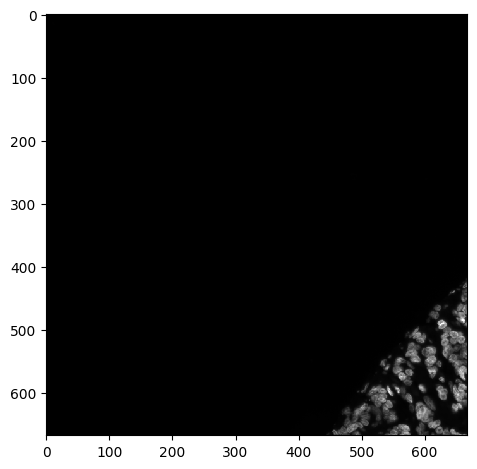

In [56]:
patch = patches[0,0]
imshow(patch[0])

[[[38 21 23 ...  8 29  9]
  [19 28  3 ...  0  7 37]
  [39  6 32 ... 13 11 25]
  ...
  [ 1 12  9 ... 36 22 16]
  [36 31 24 ... 21  6 23]
  [15 29  6 ... 15 33  4]]

 [[ 8  0 24 ... 24 21  1]
  [28 32  2 ... 28 39  9]
  [18 22  2 ... 14 17 10]
  ...
  [ 9 28 27 ...  7 26 26]
  [11 18 25 ... 17 28 25]
  [22 15 37 ...  2 16 34]]

 [[12 20 38 ... 16  8  2]
  [ 0 15 12 ...  3 12 25]
  [ 9  5 15 ... 24 38 16]
  ...
  [22 25  0 ... 34 29 11]
  [22 33 21 ... 10 23 35]
  [36 25 16 ... 29  5 14]]

 ...

 [[31 34 11 ... 38 31 25]
  [39 17  7 ... 15  8 38]
  [ 3  1 37 ...  0 30 39]
  ...
  [32 17 22 ...  8  6 33]
  [39 10  9 ...  1  4 31]
  [ 7  6 10 ...  8  0 32]]

 [[15 35  5 ... 21 39 22]
  [37  4 15 ... 14  3 31]
  [24  7 14 ... 22 31 23]
  ...
  [16  0 36 ... 30 15 34]
  [29 14  5 ... 38 34 27]
  [ 8  7 23 ... 12 39 27]]

 [[34  9 10 ... 27  4 13]
  [ 1  1 28 ... 13 14 20]
  [35 34 24 ... 15  0  3]
  ...
  [35 14  1 ... 38 21  9]
  [19 27 31 ... 37 12 33]
  [39 35  1 ... 11  9 39]]]


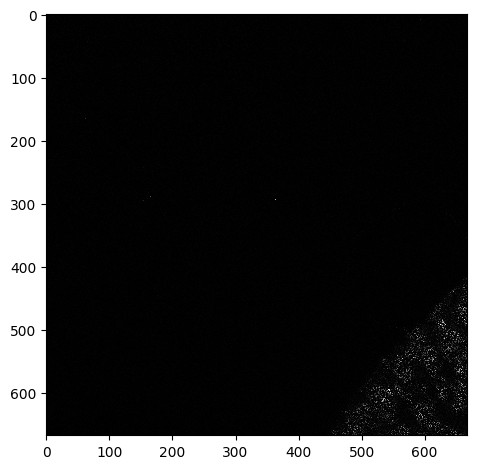

In [67]:
patch = patches[0,0]
patch = shuffle_along_axis(patch, 0)
imshow(patch[0])

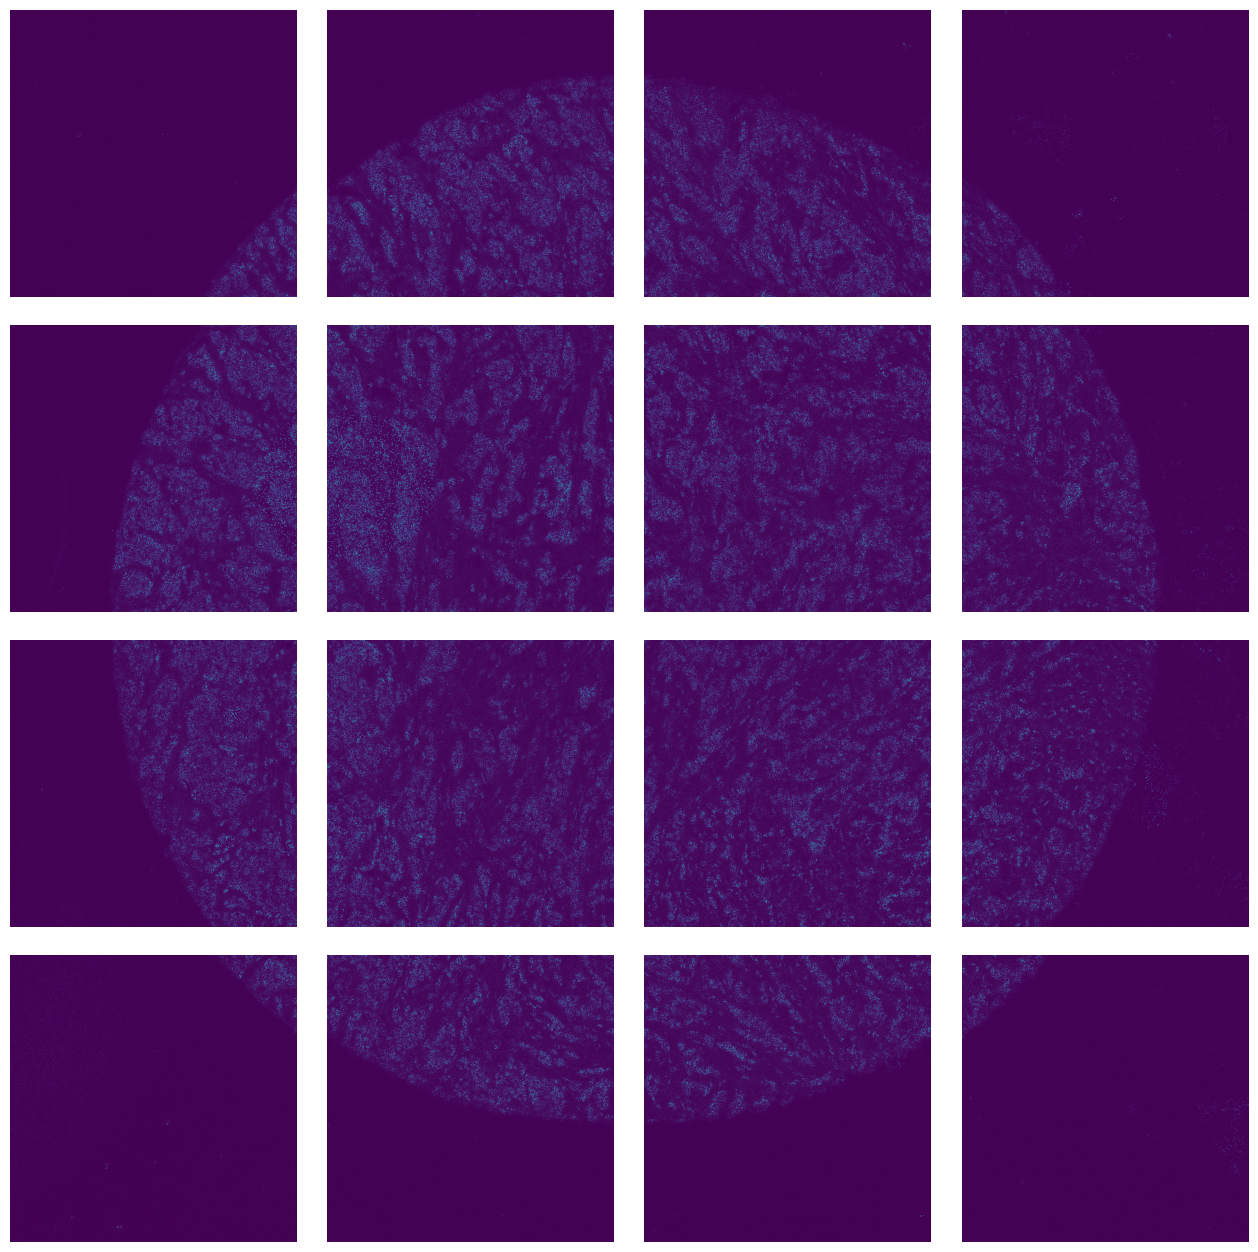

In [71]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16,16)) # Notice the equal aspect ratio
gs1 = gridspec.GridSpec(4, 4)
gs1.update(wspace=0.1, hspace=0.1) # set the spacing between axes. 
k = 0
for i in range(4):
    for j in range(4):
        a = plt.subplot(gs1[k])
        a.axis('off')
        patch = patches[i,j]
        patch = shuffle_along_axis(patch, 0)
        a.imshow(patch[0])
        a.set_aspect('equal')
        k += 1